In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
dataset = pd.read_csv('datasets-jadi.csv')

In [69]:
dataset.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [71]:
dataset.isnull().any()
dataset.isnull().sum()

NO                                        0
NAMA                                      0
USIA                                      0
PARITAS                                   0
JARAK KELAHIRAN                           0
PE/Non PE                                 0
RIW HIPERTENSI_Tidak                      0
RIW HIPERTENSI_Ya                         0
RIW PE_Ada                                0
RIW PE_Tidak                              0
OBESITAS_Tidak                            0
OBESITAS_Ya                               0
RIW DM_Tidak                              0
RIW DM_Ya                                 0
RIW HIPERTENSI/PE DALAM KELUARGA_Ada      0
RIW HIPERTENSI/PE DALAM KELUARGA_Tidak    0
SOSEK RENDAH_<UMR                         0
SOSEK RENDAH_>UMR                         0
dtype: int64

In [72]:
X = dataset.drop(columns=['PE/Non PE', 'NO', 'NAMA'])  # Menghapus kolom yang tidak diperlukan
y = dataset['PE/Non PE']  # Kolom target

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# # Apply Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train

array([[ 0.45876085,  2.32886265, -0.44296451, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-1.27902292, -0.74147645,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-0.93146617,  0.28196992, -1.8321012 , ...,  0.14433757,
        -0.08781846,  0.08781846],
       ...,
       [-0.58390941, -0.74147645,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-0.06257428, -0.74147645,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [ 1.67520948,  2.32886265, -0.44296451, ...,  0.14433757,
        -0.08781846,  0.08781846]])

In [76]:
X_test

array([[-0.58390941, -1.76492282,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [ 1.50143111,  0.28196992, -0.44296451, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-1.97413643, -0.74147645,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       ...,
       [-0.93146617,  0.28196992, -1.8321012 , ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-1.27902292, -0.74147645,  0.94617218, ...,  0.14433757,
        -0.08781846,  0.08781846],
       [-0.06257428,  0.28196992, -0.44296451, ...,  0.14433757,
        -0.08781846,  0.08781846]])

In [77]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [78]:
print(cm_nb)

[[  1 152]
 [  3  13]]


In [79]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [80]:
print(cm_knn)

[[150   3]
 [  8   8]]


In [81]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [82]:
print(cm_dt)

[[149   4]
 [  8   8]]


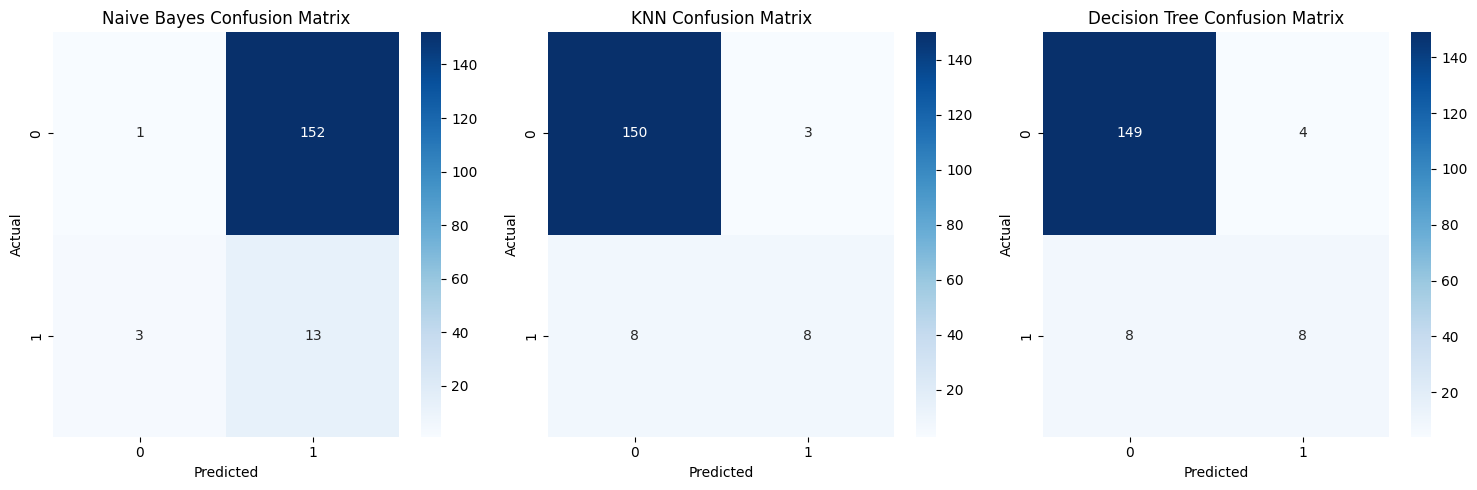

In [83]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("KNN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title("Decision Tree Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [84]:
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.01      0.01       153
           1       0.08      0.81      0.14        16

    accuracy                           0.08       169
   macro avg       0.16      0.41      0.08       169
weighted avg       0.23      0.08      0.03       169


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       153
           1       0.73      0.50      0.59        16

    accuracy                           0.93       169
   macro avg       0.84      0.74      0.78       169
weighted avg       0.93      0.93      0.93       169


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.67      0.50      0.57        16

    accuracy                           0.93       169
   macro avg       0.81

In [85]:
# Accuracy and classification report
print("Naive Bayes Accuracy:", round(accuracy_score(y_test, y_pred_nb) * 100), "%")
print("KNN Accuracy:", round(accuracy_score(y_test, y_pred_knn) * 100), "%")
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt) * 100), "%")

Naive Bayes Accuracy: 8 %
KNN Accuracy: 93 %
Decision Tree Accuracy: 93 %
